# カラー&サウンド定義

In [3]:
from playsound import playsound as ps

color_dic =  {
    '赤' : 'red',
    '黄' : 'yellow',
    '青' : 'blue',
    '黒' : 'black',
    'オレンジ' : 'orange',
    '紫' : 'purple',
    'ピンク' : 'pink',
    '緑' : 'green',
    '茶' : 'brown',
}
color_j = dict(zip(range(1,len(color_dic)+1), list(color_dic.keys())))
color_j[0] = 'もう一度聞く'
color_e = dict(zip(range(1,len(color_dic)+1), list(color_dic.values())))

def sound(x):
    ps('sound/{}.mp3'.format(color_dic[df.iloc[x,1]]))


# 新しいゲーム作成

In [4]:
#　自動上書きされるので注意
import pandas as pd
pd.set_option('display.max_columns', None)
import random

# 問題の作成
# カラムの作成
col = ['Today'] + ['session'] + ['Q'] + ['A'] + ['B'] + ['datetime']
df = pd.DataFrame(columns=col)

# 色をランダムに一つ選択して代入
first =  random.choice(list(color_dic.keys()))
df['Q'] = [first]

# 日付を代入してDatetimeIndexに変更
df['datetime'] = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

print('new game name?')

game_name = input('new game name?')
file_name = game_name + str('.csv')
df.to_csv('games/' + file_name)
print
print("New game '" + file_name + "' was created")

NameError: name 'datetime' is not defined

# 遊ぶゲームを選ぶ

In [450]:
import pandas as pd
pd.set_option('display.max_columns', None)
import glob

games = glob.glob('games/*.csv')
games_dict = dict(zip(range(1,len(games)+1), games))

print('どのゲームで遊ぶ？\n')
print(games_dict)

game = input()
df = pd.read_csv(games_dict[int(game)], index_col=0, parse_dates=True)
print()
print(games_dict[int(game)].removeprefix('games/').removesuffix('.csv') + 'で遊びます')

どのゲームで遊ぶ？

{1: 'games/keetane.csv', 2: 'games/chisa.csv', 3: 'games/test.csv', 4: 'games/hajime.csv'}

testで遊びます


In [21]:
df.tail(1)['Q'].iloc[0]

'赤'

# 遊ぶ

{1: '赤', 2: '黄', 3: '青', 4: '黒', 5: 'オレンジ', 6: '紫', 7: 'ピンク', 8: '緑', 9: '茶', 0: 'もう一度聞く'}



/var/folders/_g/xsh34k3n5s70gm9jd9v92gvc0000gn/T/ipykernel_87151/1812188774.py:74: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Today,session,Q,A,B,session time
datetime,,,,,,
2023-06-15 18:40:30,20.0,NaN,オレンジ,オレンジ,O,NaN


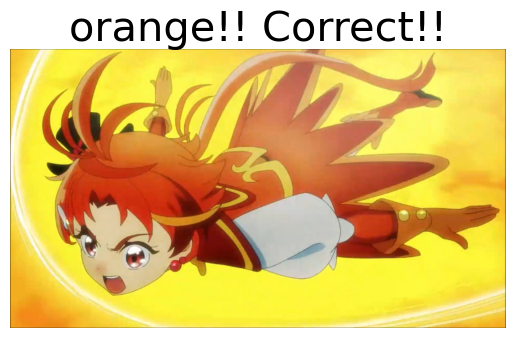

In [500]:
import pandas as pd
# カラムを全て表示する　https://kino-code.com/python-pandas-set_option/
pd.set_option('display.max_columns', None) 
import numpy as np
import random
import datetime

# 色と音の定義
color_dic =  {
    '赤' : 'red',
    '黄' : 'yellow',
    '青' : 'blue',
    '黒' : 'black',
    'オレンジ' : 'orange',
    '紫' : 'purple',
    'ピンク' : 'pink',
    '緑' : 'green',
    '茶' : 'brown',
}
color_j = dict(zip(range(1,len(color_dic)+1), list(color_dic.keys())))
color_j[0] = 'もう一度聞く'
color_e = dict(zip(range(1,len(color_dic)+1), list(color_dic.values())))

# 問題Dataframeの作成
# 一つ前の色を除いたリストの作成
new_dict = [x for x in color_dic if x != df['Q'].iloc[-1]]

# 一つ前の色を除いたリストの作成から色を一つ選択
second =  random.choice(list(new_dict))

# カラムの作成
col = ['Today'] + ['session'] + ['Q'] + ['A'] + ['B'] + ['datetime']
df2 = pd.DataFrame(columns=col)
# Rowの作成
df2['Q'] = [second]

df2['datetime'] = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2.set_index('datetime', inplace=True)

# 問題の音を鳴らす
def sound():
    ps('sound/{}.mp3'.format(color_dic[df2['Q'].iloc[0]]))

def question():
    # 選択肢の表示
    sound()
    answer = input('何色の音？')

    while int(answer) == 0:
        sound()
        answer = input('何色の音?')
    df2['A'].iloc[0] = color_j[int(answer)]

    if df2['Q'].iloc[0] == df2['A'].iloc[0] :
        df2['B'].iloc[0] = 'O'
    else :
        df2['B'].iloc[0] = 'X'

print(color_j)
print()

question()

title = color_dic[df2['Q'].iloc[0]]
cw = '!! Correct!!' if df2['Q'].iloc[0] == df2['A'].iloc[0] else '!! Wrong...'
title = title + cw
img = imread('images/{}.jpg'.format(color_dic[df2['Q'].iloc[0]]))
plt.title(title, fontsize=30)
plt.axis('off')
plt.imshow(img)

df = pd.concat([df, df2])
df['Today'].iloc[-1] = df.resample('D').count().iloc[-1,-3]
df.to_csv(games_dict[int(game)])
df.tail(1)

# もう一度聞く

In [302]:
sound()

# 好きな音を聞く

In [353]:
print(color_j)
test = input('test?')
ps('sound/{}.mp3'.format(color_dic[color_j[int(test)]]))


{1: '赤', 2: '黄', 3: '青', 4: '黒', 5: 'オレンジ', 6: '紫', 7: 'ピンク', 8: '緑', 9: '茶', 0: 'もう一度聞く'}


# 今日の結果を振り返る

In [48]:
df.reset_index()[['Q', 'A', 'B']].tail(30).T

,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126
Q,ピンク,茶,オレンジ,黒,青,茶,紫,黒,青,紫,黄,オレンジ,茶,紫,茶,紫,茶,赤,黒,緑,赤,緑,オレンジ,緑,茶,緑,オレンジ,黄,紫,赤
A,赤,青,赤,ピンク,オレンジ,青,黄,ピンク,黄,茶,ピンク,紫,青,黒,ピンク,緑,黒,青,黒,紫,青,ピンク,紫,オレンジ,黒,紫,青,オレンジ,ピンク,赤
B,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,O,X,X,X,X,X,X,X,X,X,X,O


###  今日の結果一覧

In [309]:
df[datetime.datetime.now().strftime('%Y-%m-%d'):].resample('H').count()

,Today,session,Q,A,B
datetime,,,,,


# 正答率をグラフで確認

In [501]:
import plotly.express as px
ddf = df[datetime.datetime.now().strftime('%Y-%m-%d'):]

fig = px.sunburst(ddf, 
                  path=['Q', 'A'], 
                  values=[1]*len(ddf), 
                  color='A',
                  color_discrete_map=color_dic
                  )
fig.update_layout(height=600, width=800, title_text="Today")
fig.show()



In [420]:
df['Today'] = df['Today'].astype('Int64')
df

,Today,session,Q,A,B,session time
datetime,,,,,,
2023-05-07 23:41:20,4,NaN,ピンク,NaN,NaN,23
2023-05-07 23:42:34,4,NaN,赤,赤,O,23
2023-05-07 23:42:40,4,NaN,茶,茶,O,23
2023-05-07 23:42:47,4,NaN,黄,青,X,23
2023-05-07 23:51:07,5,NaN,ピンク,ピンク,O,23
...,...,...,...,...,...,...
2023-05-14 00:28:28,1,NaN,青,赤,X,00
2023-05-14 00:53:23,2,NaN,黒,赤,X,00
2023-05-14 01:00:23,3,NaN,緑,緑,O,01


In [358]:
df[datetime.datetime.now().strftime('%Y-%m-%d'):].resample('H').count()


,Today,session,Q,A,B
datetime,,,,,
2023-05-14,2,0,2,2,2


In [429]:
count = df[datetime.date.today():].groupby('session time').count()
df['session'].iloc[-1]  = count['Today'].iloc[-1]
df['session'] = df['session'].astype('int64')

df

/var/folders/_g/xsh34k3n5s70gm9jd9v92gvc0000gn/T/ipykernel_87151/757460830.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [394]:
len(df[datetime.date.today():].groupby('session').count())


2

In [410]:
df['session time'] = df.index.strftime('%H')
df

,Today,session,Q,A,B,session time
datetime,,,,,,
2023-05-07 23:41:20,4.0,NaN,ピンク,NaN,NaN,23
2023-05-07 23:42:34,4.0,NaN,赤,赤,O,23
2023-05-07 23:42:40,4.0,NaN,茶,茶,O,23
2023-05-07 23:42:47,4.0,NaN,黄,青,X,23
2023-05-07 23:51:07,5.0,NaN,ピンク,ピンク,O,23
...,...,...,...,...,...,...
2023-05-14 00:28:28,1.0,NaN,青,赤,X,00
2023-05-14 00:53:23,2.0,NaN,黒,赤,X,00
2023-05-14 01:00:23,3.0,NaN,緑,緑,O,01


In [376]:
df[datetime.date.today():].groupby('H').count()

KeyError: 'H'

In [371]:
df['Today'].resample('H').count()


datetime
2023-05-07 23:00:00    6
2023-05-08 00:00:00    2
2023-05-08 01:00:00    0
2023-05-08 02:00:00    0
2023-05-08 03:00:00    0
                      ..
2023-05-13 21:00:00    0
2023-05-13 22:00:00    0
2023-05-13 23:00:00    0
2023-05-14 00:00:00    2
2023-05-14 01:00:00    1
Freq: H, Name: Today, Length: 147, dtype: int64

In [374]:
df[]

Today      157
session      0
Q          307
A          306
B          306
dtype: int64

In [352]:
data = {'date': ['2022-05-10', '2022-05-10', '2022-05-11', '2022-05-11', '2022-05-12'], 'value': [1, 2, 3, 4, 5]}
ddf = pd.DataFrame(data)
ddf['date'] = pd.to_datetime(ddf['date'])  # datetime型に変換
ddf.set_index('date', inplace=True)  # datetimeindexに設定
today = pd.Timestamp.today().date()
# ddf[ddf.index==today]
ddf.index[0]


Timestamp('2022-05-10 00:00:00')

# 回答する

In [60]:
import pandas as pd
pd.set_option('display.max_columns', None)
from playsound import playsound as ps

# カラー&サウンド定義
color_dic =  {
    '赤' : 'red',
    '黄' : 'yellow',
    '青' : 'blue',
    '黒' : 'black',
    'オレンジ' : 'orange',
    '紫' : 'purple',
    'ピンク' : 'pink',
    '緑' : 'green',
    '茶' : 'brown',
}
color_j = dict(zip(range(1,len(color_dic)+1), list(color_dic.keys())))
color_j[0] = 'もう一度聞く'
color_e = dict(zip(range(1,len(color_dic)+1), list(color_dic.values())))

def sound(x):
    ps('sound/{}.mp3'.format(color_dic[df2.iloc[x,1]]))

print(color_j)
print()

# ここからが回答
for x in range(30):
    print(str(x+1)+'問目')
    # print(color_j)

    sound(x)
    answer = input(str(x)+'?')

    while int(answer) == 0:
        sound(x)
        answer = input(str(x)+'?')
    df2.iloc[x, 2] = color_j[int(answer)]

    if df2.iloc[x,1] == df2.iloc[x,2] :
        print(df2.iloc[x,1] + ' : 正解! ^o^ せいかい!! \^o^/\n')
        df2.iloc[x,3] = 'O'
    else :
        print(df2.iloc[x,1] + ' : 残念...ざんねん... o_o\n')
        df2.iloc[x,3] = 'X'

    # print(df.iloc[0,x+1])
print('{}問 せいかいしたよ！ (^.u.^)'.format(list(df2['B']=='O').count(True)))
df = pd.concat([df, df2], ignore_index=True)
df.to_csv(games_dict[int(game)], index=False)
df2[['No.', 'Q', 'A', 'B']].T


{1: '赤', 2: '黄', 3: '青', 4: '黒', 5: 'オレンジ', 6: '紫', 7: 'ピンク', 8: '緑', 9: '茶', 0: 'もう一度聞く'}

1問目


PermissionError: [Errno 1] Operation not permitted

# テスト用回答作成

In [54]:
import random

# カラムの作成
col = ['Today'] + ['session'] + ['Q'] + ['A'] + ['B'] + ['datetime']
df2 = pd.DataFrame(columns=col)

# 色をランダムに一つ選択して代入
first =  random.choice(list(color_dic.keys()))
new_dict = [c for c in color_dic if c != first]

# 色をdfに追加し、新たなリストを作成、をloop
df2['Q'] = list(range(30))
for x in range(30):
    df2['Q'].iloc[x] = random.choice(new_dict)
    new_dict = [c for c in color_dic if c != df2['Q'].iloc[x]]

# 色をdfに追加し、新たなリストを作成、をloop
for x in range(30):
    df2['A'].iloc[x] = random.choice(new_dict)
    new_dict = [c for c in color_dic if c != df2['A'].iloc[x]]
    if df2['A'].iloc[x]==df2['Q'].iloc[x]:
        df2['B'].iloc[x]='O'
    else :
        df2['B'].iloc[x]='X'

df2['datetime'] = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2.set_index('datetime', inplace=True)


df = pd.concat([df, df2])
# df.to_csv(games_dict[int(game)], index=False)
df

/var/folders/_g/xsh34k3n5s70gm9jd9v92gvc0000gn/T/ipykernel_87151/3068062770.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Today,session,Q,A,B
datetime,,,,,
2023-05-07 23:41:20,4,NaN,ピンク,NaN,NaN
2023-05-07 23:42:34,4,NaN,赤,赤,O
2023-05-07 23:42:40,4,NaN,茶,茶,O
2023-05-07 23:42:47,4,NaN,黄,青,X
2023-05-07 23:51:07,5,NaN,ピンク,ピンク,O
...,...,...,...,...,...
2023-05-08 00:40:33,NaN,NaN,黒,茶,X
2023-05-08 00:40:33,NaN,NaN,緑,紫,X
2023-05-08 00:40:33,NaN,NaN,青,緑,X


# 間違ったペアをサンバーストで

In [201]:
import plotly.express as px

fig = px.sunburst(df.iloc[1:], 
                  path=['Q', 'A'], 
                  values=[1]*len(df[1:]), 
                  color='B',
                  color_discrete_map={'O': 'green', 'X': 'red'}
                  )
fig.update_layout(height=600, width=800, title_text="Total")
fig.show()



In [12]:
import plotly.graph_objects as go
import plotly.subplots as sp
fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type': 'sunburst'}, {'type': 'sunburst'}]])

fig.add_trace(go.Sunburst(labels=df['Q'], parents=df['A'], values=[1]*len(df)), row=1, col=1)
# fig.add_trace(go.Sunburst(labels=df2['Q'], parents=df2['A'], values=[1]*len(df2)), row=1, col=2)

fig.update_layout(height=600, width=800, title_text="Two Sunburst Charts")
fig.show()


# 音別正答率の折れ線グラフ日付で